### Visual and check icesat2 data on the study region.
##### 1. Visual the icesat2 data on the study region.
##### 2. Compare icesat2 atl3 and atl6 data (weak/strong beams). 

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)


In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


In [3]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_wkunlun_vec = 'data/boundary/wkunlun.gpkg'
path_karakoram_vec = 'data/boundary/karakoram.gpkg'
path_wkunlun_rgi60 = 'data/rgi60/rgi60_13_wkunlun.gpkg'
path_karakoram_rgi60 = 'data/rgi60/rgi60_14_karakoram.gpkg'



In [17]:
### Read one-month ATL06 data
with h5py.File('data/icesat/atl06-readout/atl06_2020.h5','r') as f_atl06:
    atl06_lat_202001   = f_atl06['h_lat'][:]
    atl06_lon_202001   = f_atl06['h_lon'][:]
    atl06_h_202001 = f_atl06['h_li'][:]
    atl06_time_202001 = f_atl06['t_dyr'][:]
    atl06_beam_202001 = f_atl06['beam_type'][:]
    atl06_spot_202001 = f_atl06['spot'][:]    # 1->strong; 0->weak
    atl06_rgt_202001 = f_atl06['rgt'][:]    # 1->strong; 0->weak
    print(f_atl06.keys())


<KeysViewHDF5 ['beam_type', 'cycle', 'h_lat', 'h_li', 'h_lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>


In [7]:
### Read one-month atl03 data
plt.figure(figsize=[8, 8])
with h5py.File('data/icesat/atl03-readout/ATL03_202001.h5','r') as f_atl03:
    atl03_lat_202001   = f_atl03['h_lat'][:]
    atl03_lon_202001   = f_atl03['h_lon'][:]
    atl03_h_202001 = f_atl03['h_li'][:]
    atl03_time_202001 = f_atl03['t_dyr'][:]
    atl03_beam_202001 = f_atl03['beam_type'][:]    # 1->strong; 0->weak
    atl03_spot_202001 = f_atl03['spot'][:]    # 1->strong; 0->weak
    atl03_rgt_202001 = f_atl03['rgt'][:]    # 1->strong; 0->weak
    print(f_atl03.keys())



<KeysViewHDF5 ['beam_type', 'cycle', 'h_lat', 'h_li', 'h_lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>


<Figure size 576x576 with 0 Axes>

### 1. Global view for atl06 data

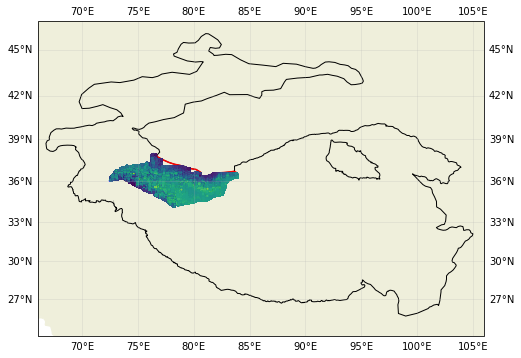

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))

ax.set_extent([66, 106, 24.0, 45.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
## 1. tibet boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_hma_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='Black', linewidth=1, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 3. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. icesat-2 atl06 data
ax.scatter(x=atl06_lon_202001, y=atl06_lat_202001, c=atl06_h_202001, \
                                 s=1, transform=ccrs.PlateCarree(), zorder=0)


### 2. Local view

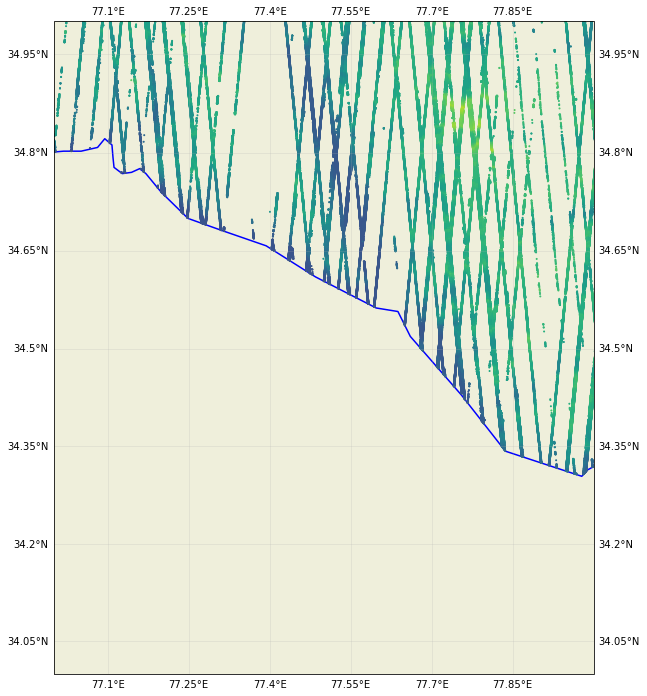

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# ax.set_extent([71, 85, 33.0, 39.0])
ax.set_extent([77, 78, 34.0, 35.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 3. icesat-2 atl06 data
ax.scatter(x=atl06_lon_202001, y=atl06_lat_202001, c=atl06_h_202001, \
                                      s=1, transform=ccrs.PlateCarree(), zorder=0)


### 3. Visualize the tracks of ATL03 and ATL06 data, respectively. 

Text(0.5, 1.0, 'ATL03-spot (One month, valid)')

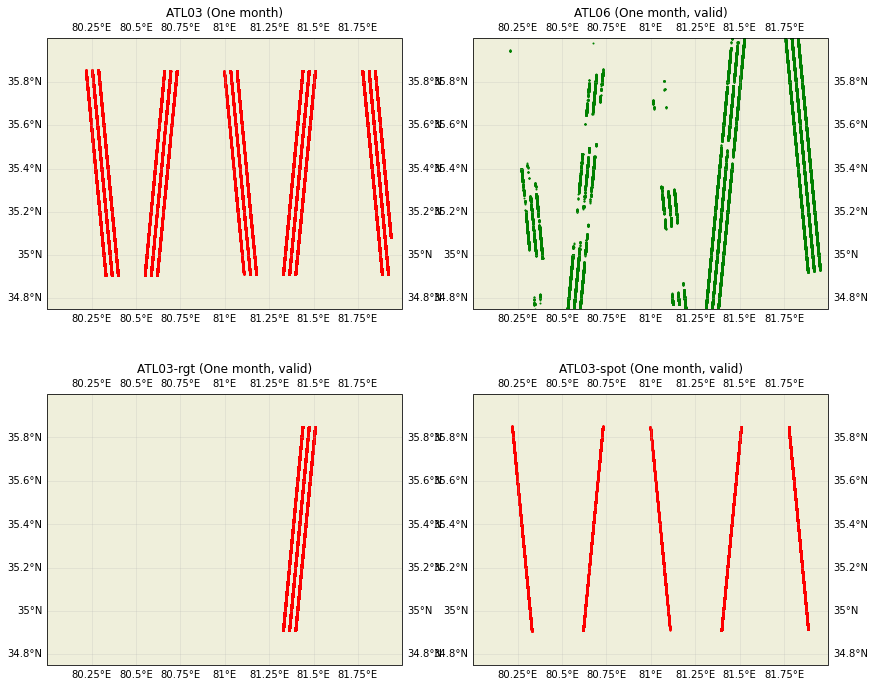

In [14]:
## Visualize the one-month atl03 data
idx_atl03_rgt = np.where((atl03_rgt_202001 == 142))[0]  # specific reference ground track
idx_atl03_spot = np.where((atl03_spot_202001 == 5))[0]  # specific spot
fig = plt.figure(figsize=(14, 12))
ax_1 = fig.add_subplot(2, 2, 1, projection=ccrs.Mercator())
ax_1.set_extent([80, 82, 34.75, 36])
ax_1.add_feature(cfeature.LAND); 
ax_1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax_1.scatter(x=atl03_lon_202001, y=atl03_lat_202001, color='red', s=1, transform=ccrs.PlateCarree(), zorder=0)
plt.title('ATL03 (One month)')

ax_2 = fig.add_subplot(2, 2, 2, projection=ccrs.Mercator())
ax_2.set_extent([80, 82, 34.75, 36])
ax_2.add_feature(cfeature.LAND);
ax_2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax_2.scatter(x=atl06_lon_202001, y=atl06_lat_202001, color='green', s=1, transform=ccrs.PlateCarree(), zorder=0)
plt.title('ATL06 (One month, valid)')

ax_3 = fig.add_subplot(2, 2, 3, projection=ccrs.Mercator())
ax_3.set_extent([80, 82, 34.75, 36])
ax_3.add_feature(cfeature.LAND);
ax_3.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax_3.scatter(x=atl03_lon_202001[idx_atl03_rgt], y=atl03_lat_202001[idx_atl03_rgt], \
                                    color='red', s=1, transform=ccrs.PlateCarree(), zorder=0)
plt.title('ATL03-rgt (One month, valid)')

ax_4 = fig.add_subplot(2, 2, 4, projection=ccrs.Mercator())
ax_4.set_extent([80, 82, 34.75, 36])
ax_4.add_feature(cfeature.LAND); 
ax_4.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax_4.scatter(x=atl03_lon_202001[idx_atl03_spot], y=atl03_lat_202001[idx_atl03_spot], \
                                    color='red', s=1, transform=ccrs.PlateCarree(), zorder=0)
plt.title('ATL03-spot (One month, valid)')



### 2. Compare the weak beam and strong beam.

Text(0.5, 1.0, 'atl06 weak beam (red) and strong beam (green) tracks')

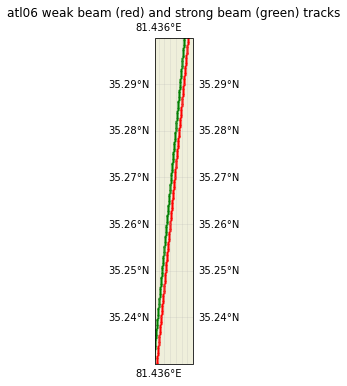

In [15]:
#### Weak-beam track vs. Strong-beam track
#### specific rgt, spot, and beam_type.
# idx_atl06_w = np.where((atl06_rgt_202001 == 142) & (atl06_spot_202001 <= 2) & (atl06_beam_202001 == 0))[0]  # weak beam (left beam)
# idx_atl06_s = np.where((atl06_rgt_202001 == 142) & (atl06_spot_202001 <= 2) & (atl06_beam_202001 == 1))[0]  # strong beam (left beam)

idx_atl06_w = np.where((atl06_rgt_202001 == 142) & (atl06_spot_202001 >= 5) & (atl06_beam_202001 == 0))[0]  # weak beam (left beam)
idx_atl06_s = np.where((atl06_rgt_202001 == 142) & (atl06_spot_202001 >= 5) & (atl06_beam_202001 == 1))[0]  # strong beam (left beam)


fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# ax.set_extent([81.385, 81.389, 35.41, 35.425])
ax.set_extent([81.435, 81.445, 35.23, 35.3])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax.scatter(x=atl06_lon_202001[idx_atl06_w], y=atl06_lat_202001[idx_atl06_w], \
                            c='r', vmax=7000, vmin=4000, s=1, transform=ccrs.PlateCarree(), zorder=0)
ax.scatter(x=atl06_lon_202001[idx_atl06_s], y=atl06_lat_202001[idx_atl06_s], \
                            c='g', vmax=7000, vmin=4000, s=1, transform=ccrs.PlateCarree(),zorder=0)
plt.title('atl06 weak beam (red) and strong beam (green) tracks')


### 2. Compare the weak beams of atl03 and atl06, and the strong beams of atl03 and atl06, respectively.



Text(0.5, 1.0, 'ATL03-ATL06/strong beam (local)')

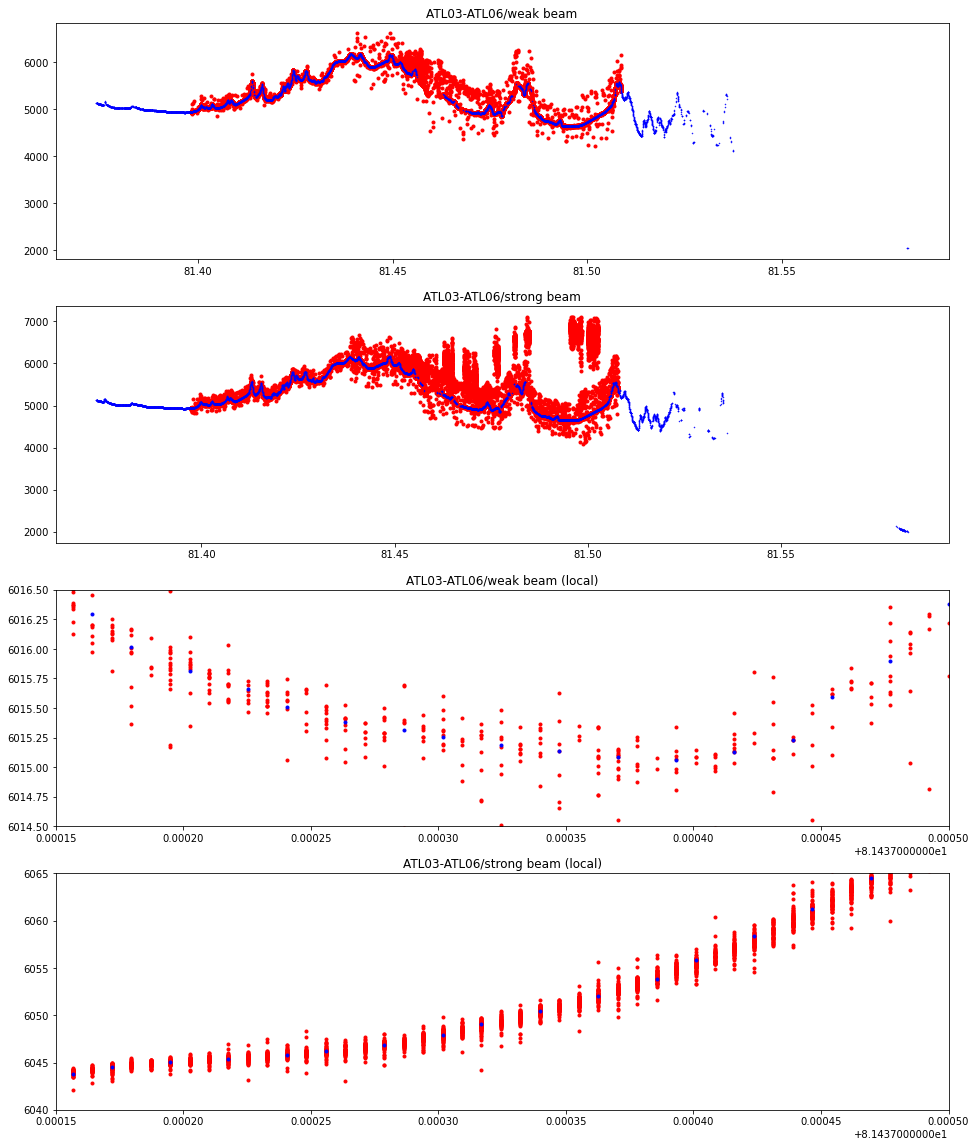

In [16]:
idx_atl03_w = np.where((atl03_rgt_202001 == 142) & (atl03_spot_202001 >= 5) & (atl03_beam_202001 == 0))[0]  # weak beam (left beam)
idx_atl03_s = np.where((atl03_rgt_202001 == 142) & (atl03_spot_202001 >= 5) & (atl03_beam_202001 == 1))[0]  # strong beam (left beam)

plt.figure(figsize=(16, 20))
# ### weak beam
plt.subplot(4,1,1)
plt.plot(atl03_lon_202001[idx_atl03_w], atl03_h_202001[idx_atl03_w], 'r.')
plt.plot(atl06_lon_202001[idx_atl06_w], atl06_h_202001[idx_atl06_w], 'b.', markersize=1)
plt.title('ATL03-ATL06/weak beam')

### strong beam
plt.subplot(4,1,2)
plt.plot(atl03_lon_202001[idx_atl03_s], atl03_h_202001[idx_atl03_s], 'r.')
plt.plot(atl06_lon_202001[idx_atl06_s], atl06_h_202001[idx_atl06_s], 'b.',markersize=1)
plt.title('ATL03-ATL06/strong beam')

# #### Sub_region
### Weak beam
plt.subplot(4,1,3)
plt.plot(atl03_lon_202001[idx_atl03_w], atl03_h_202001[idx_atl03_w], 'r.')
plt.plot(atl06_lon_202001[idx_atl06_w], atl06_h_202001[idx_atl06_w], 'b.')
plt.xlim(81.43715, 81.4375)
plt.ylim(6014.5, 6016.5)
plt.title('ATL03-ATL06/weak beam (local)')
### Strong beam
plt.subplot(4,1,4)
plt.plot(atl03_lon_202001[idx_atl03_s], atl03_h_202001[idx_atl03_s], 'r.')
plt.plot(atl06_lon_202001[idx_atl06_s], atl06_h_202001[idx_atl06_s], 'b.')
plt.xlim(81.43715, 81.4375)
plt.ylim(6040, 6065)
plt.title('ATL03-ATL06/strong beam (local)')

